In [2]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [4]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'))

In [5]:
# 풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 두번째 합성곱-풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [8]:
# 일렬로 펼치기
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

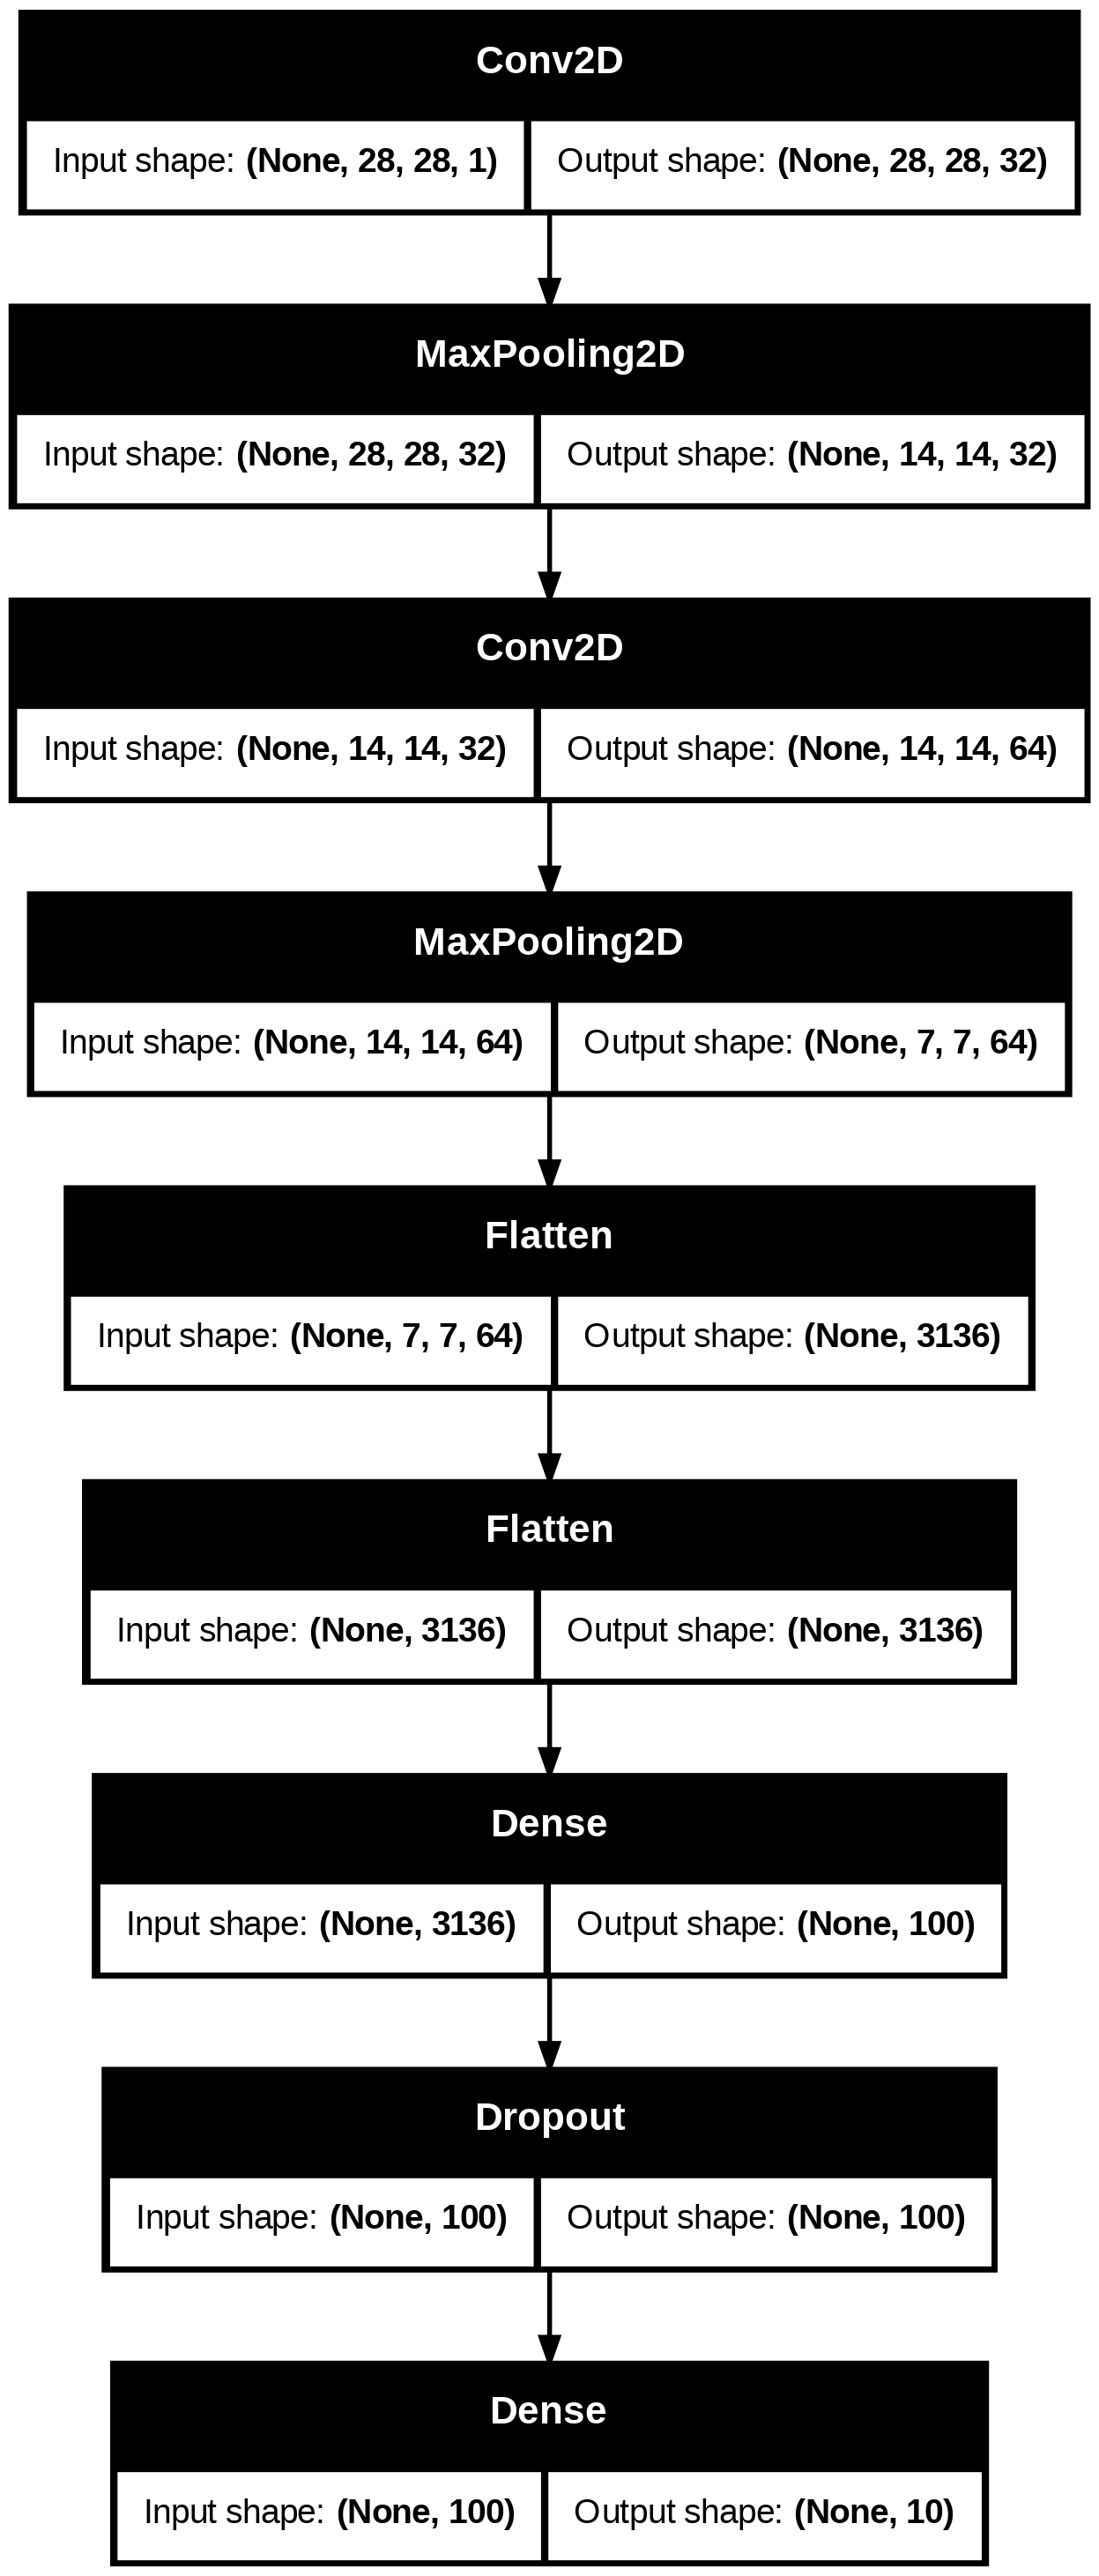

In [14]:
keras.utils.plot_model(model, show_shapes=True)

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'best-cnn-model.keras',
    save_best_only=True
)

early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    train_scaled,
    train_target,
    epochs=20,   # ← 여기
    validation_data=(val_scaled, val_target),
    callbacks=[checkpoint_cb, early_stopping_cb]
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.7426 - loss: 0.7145 - val_accuracy: 0.8727 - val_loss: 0.3360
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.8722 - loss: 0.3570 - val_accuracy: 0.8905 - val_loss: 0.2922
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 55s 37ms/step - accuracy: 0.8922 - loss: 0.3034 - val_accuracy: 0.9076 - val_loss: 0.2500
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 24ms/step - accuracy: 0.9040 - loss: 0.2654 - val_accuracy: 0.9122 - val_loss: 0.2433
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.9125 - loss: 0.2434 - val_accuracy: 0.9159 - val_loss: 0.2322
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9228 - loss: 0.2156 - val_accuracy: 0.9209 - val_loss: 0.2216
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9251 - loss: 0.2033 - val_accuracy: 0.9228 - val_loss: 0.2124
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.9322 -

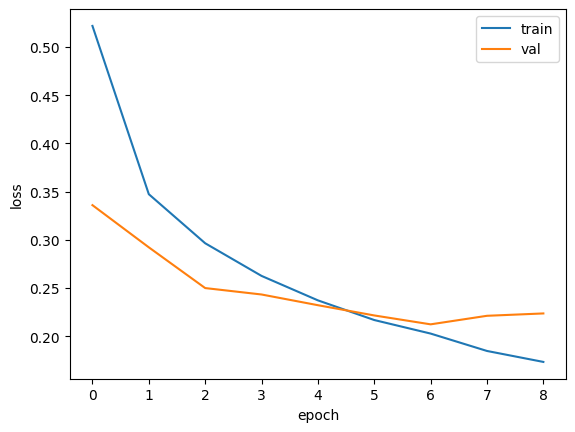

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [19]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9243 - loss: 0.2091


[0.21236950159072876, 0.9228333234786987]

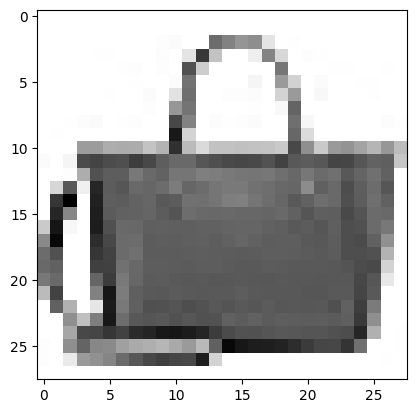

In [21]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [23]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[4.1475754e-14 1.2766180e-20 9.0405258e-15 4.9582825e-14 1.9404538e-15
  1.8554468e-12 3.4237737e-15 3.1468287e-14 1.0000000e+00 5.2721258e-15]]


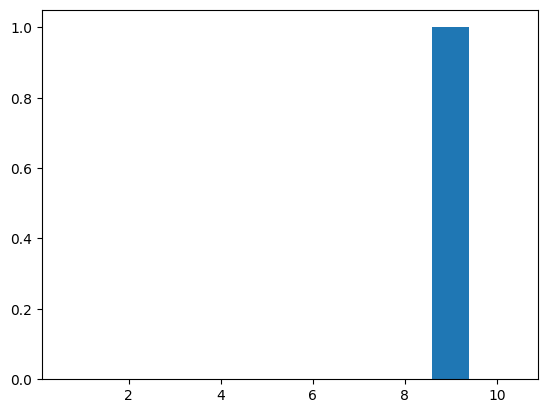

In [25]:
plt.bar(range(1,11),preds[0])
plt.show()

In [27]:
test_scaled = test_input.reshape(-1,28,28,1) /255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9161 - loss: 0.2443


[0.23656542599201202, 0.9176999926567078]

In [30]:
model.save("best-cnn-model.keras")

In [33]:
!ls /content

best-cnn-model.keras  model.png  sample_data


In [36]:
from google.colab import drive
drive.mount('/content/drive')

model.save('/content/drive/MyDrive/best-cnn-model.keras')


Mounted at /content/drive
